In [102]:
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Entrez
import re
import os 
from Bio.Align.Applications import ClustalwCommandline


## Ingresemos a la base de datos HGNC y escogemos el tema de Large subunit mitochondrial ribosomal proteins. En los resultados 
## obtenemos 48 secuencias de los datos curados del refseq den NCBI

list_accesion = ["NM_020236.4", "NM_001300848", "NM_007208", "NM_015956", "NM_145255",  "NM_016050", "NM_002949", "NM_014078", 
                 "NM_032111", "NM_014175",  "NM_017840", "NM_022061", "NM_001318817", "NM_014763", "NM_017971", "NM_181512", 
                 "NM_001014990", "NM_021134", "NM_145729", "NM_016504", "NM_006428", "NM_145212", "NM_031903", "NM_004891", 
                 "NM_023937", "NM_016622", "NM_032479", "NM_016491", "NM_032478", "NM_017446", "NM_003776", "NM_032477", 
                 "NM_014050", "NM_001308396", "NM_022915", "NM_032351", "NM_022163", "NM_020409", "NM_016055", "NM_004927", 
                 "NM_019051", "NM_016497", "NM_180982", "NM_053050", "NM_172251", "NM_181454", "NM_024026", "NM_001545"]

print ("Obtuvimos de la base de datos HGNC", len(list_accesion), "secuencias que seran analizadas")

## Descargamos todos las secuencias de genbank en formato .gb de la lista de accesion creada 

file_sequence = open("secuencias.gb", "w")

annotations = []
comentarios  = []
tamaño_cell_sana = []
tamaño_cell_enferma = []
ids_sanas = [] 
ids_enfermas = []


## references_title = []

## Debido a que las secuencias obtenidas pertenecen al refseq, en la parte de annotations existen bastantes articulos 
## involucrados en la seccion references. Por lo tanto, lo mas adecuado es trabajar con el annotations comment que brinda 
## un resumen de la informacion. 

Entrez.email = "jhanina.torres@est.ikiam.edu.ec" 
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= list_accesion) as handle: 
    #print (handle)
    for seq_record in SeqIO.parse(handle, "gb"): 
        #print (seq_record)
        file_sequence.write(str(seq_record))
        annotations.append(seq_record.annotations)
        #print ("\n", seq_record.annotations["comment"], "\n")

## En este caso descriminaremos a las secuencias por la frase "full lenght", aquellas secuencias que hagan match con la frase 
## se las cataloga como celulas sana y las que no como celulas incompletas o "celulas enfermas"

        if "full length" in seq_record.annotations["comment"]:
            tamaño_cell_sana.append(len(seq_record))
            ids_sanas.append(seq_record.id)
            print ("La secuencia", seq_record.id, "es una celula sana")
        else: 
            tamaño_cell_enferma.append(len(seq_record))
            ids_enfermas.append(seq_record.id)
            print ("La secuencia", seq_record.id, "es una celula dañada")


#print ("Adenocarcinoma" in references)

#for i in range(len(references)):
    #print (i)
    #references_title.append(references[i][2]) 

#for i in range(len(references)): 
    #if "Adenocarcinoma" in references_title[i]: 
        #print ("celula esta dañada")
#print (annotations["topology"])
#print (references_title[0]) 
#print (annotations[0])

Obtuvimos de la base de datos HGNC 48 secuencias que seran analizadas
La secuencia NM_020236.4 es una celula sana
La secuencia NM_001300848.2 es una celula dañada
La secuencia NM_007208.4 es una celula sana
La secuencia NM_015956.3 es una celula dañada
La secuencia NM_145255.4 es una celula sana
La secuencia NM_016050.5 es una celula sana
La secuencia NM_002949.4 es una celula sana
La secuencia NM_014078.6 es una celula dañada
La secuencia NM_032111.4 es una celula sana
La secuencia NM_014175.4 es una celula dañada
La secuencia NM_017840.4 es una celula sana
La secuencia NM_022061.4 es una celula dañada
La secuencia NM_001318817.2 es una celula dañada
La secuencia NM_014763.4 es una celula sana
La secuencia NM_017971.4 es una celula sana
La secuencia NM_181512.1 es una celula dañada
La secuencia NM_001014990.3 es una celula dañada
La secuencia NM_021134.4 es una celula sana
La secuencia NM_145729.3 es una celula sana
La secuencia NM_016504.3 es una celula sana
La secuencia NM_006428.5 

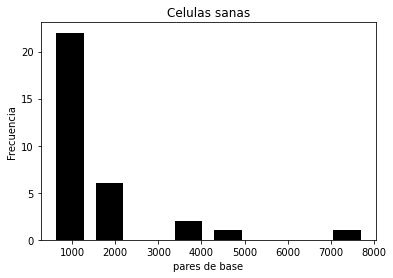

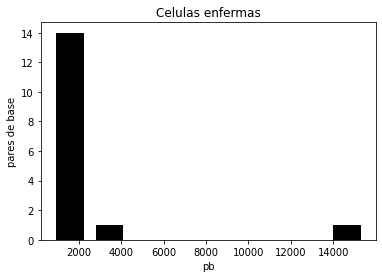

In [109]:
## realizar histograma 
## celulas sanas 
tamaño_todas = tamaño_cell_sana + tamaño_cell_enferma
import matplotlib
import matplotlib.pyplot as plt
plt.hist(tamaño_cell_sana, bins = 8, color = "black", rwidth=0.7)
plt.title("Celulas sanas")
plt.xlabel("pares de base")
plt.ylabel("Frecuencia")
plt.show()
## celulas enfermas
plt.hist(tamaño_cell_enferma, bins = 8, color = "black", rwidth=0.7)
plt.title("Celulas enfermas")
plt.xlabel("pb")
plt.ylabel("pares de base")
plt.show()


Se realizaron dos histogramas con las longitudes de las secuencias (pb) de las celulas sanas y celulas enfermas. El primer grafico muestra una amplia distribucion de las secuencias enfermas que van de entre 1000 hasta mas de 7000 pb. Resultados diferentes se obtuvieron en la celulas enfermas debido a que presento una menor distribucion y los valores fueron especificos en valores alrededor de 2000 - 300 y 14.000 pb. Los datos sugieren que las secuencias sanas presentan una mayor frecuencia en 1000 pb y las enfermas alrededor de 2000 pb. Sin embargo, a pesar que pueda ser dificil de poder discriminar solo con este parametros, se puede decir que las secuencias de >2000 hasta <8000 es casi seguro de que se trate de celulas sanas. Por otro lado, si la secuencia presenta una longitud >14.000 es casi seguro que es una celula enferma. Se necesitaria mas datos para poder descriminar a las celulas sanas y enfermas, asi que como otros filtros que faciliten la caracterización de las celulas 

In [111]:
## se obtiene todos los ids para poder descargar las secuencias en formato tipo fasta y guardarlas en el archivo secuencias.fasta
ids_total = ids_sanas + ids_enfermas

file = open("secuencias.fasta", "w")

for linea in ids_total:  
    Entrez.email="jhanina.torres@est.ikiam.edu.ec"
    handle=Entrez.efetch(db="nucleotide" ,id=linea ,rettype="fasta", retmode="text")
    data=(handle.read())
    file.write(data)
file.close()

In [113]:
## se declara la ubicacion del software clustalw2 
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
#clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "secuencias.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
ClustalAlign = AlignIO.read("secuencias.aln", "clustal") ##se crea el alineamiento 
print(ClustalAlign)
tree = Phylo.read("secuencias.dnd", "newick")


"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=secuencias.fasta
Alignment with 48 rows and 15708 columns
--------------------------------------------...--- NM_180982.3
ATTGAAACAAGATGGCGGGTTCGTGGTGAGAAGCCGTCAAGGAG...CTA NM_014050.4
--------------------------------------------...--- NM_024026.5
--------------------------------------------...--- NM_031903.3
--------------------------------------------...--- NM_032477.3
--------------------------------------------...--- NM_015956.3
--------------------------------------------...--- NM_002949.4
--------------------------------------------...--- NM_021134.4
--------------------------------------------...--- NM_016050.5
--------------------------------------------...--- NM_004891.4
--------------------------------------------...--- NM_022061.4
--------------------------------------------...--- NM_032111.4
--------------------------------------------...--- NM_016622.4
--------------------------------------------...--- NM_017971.4
---

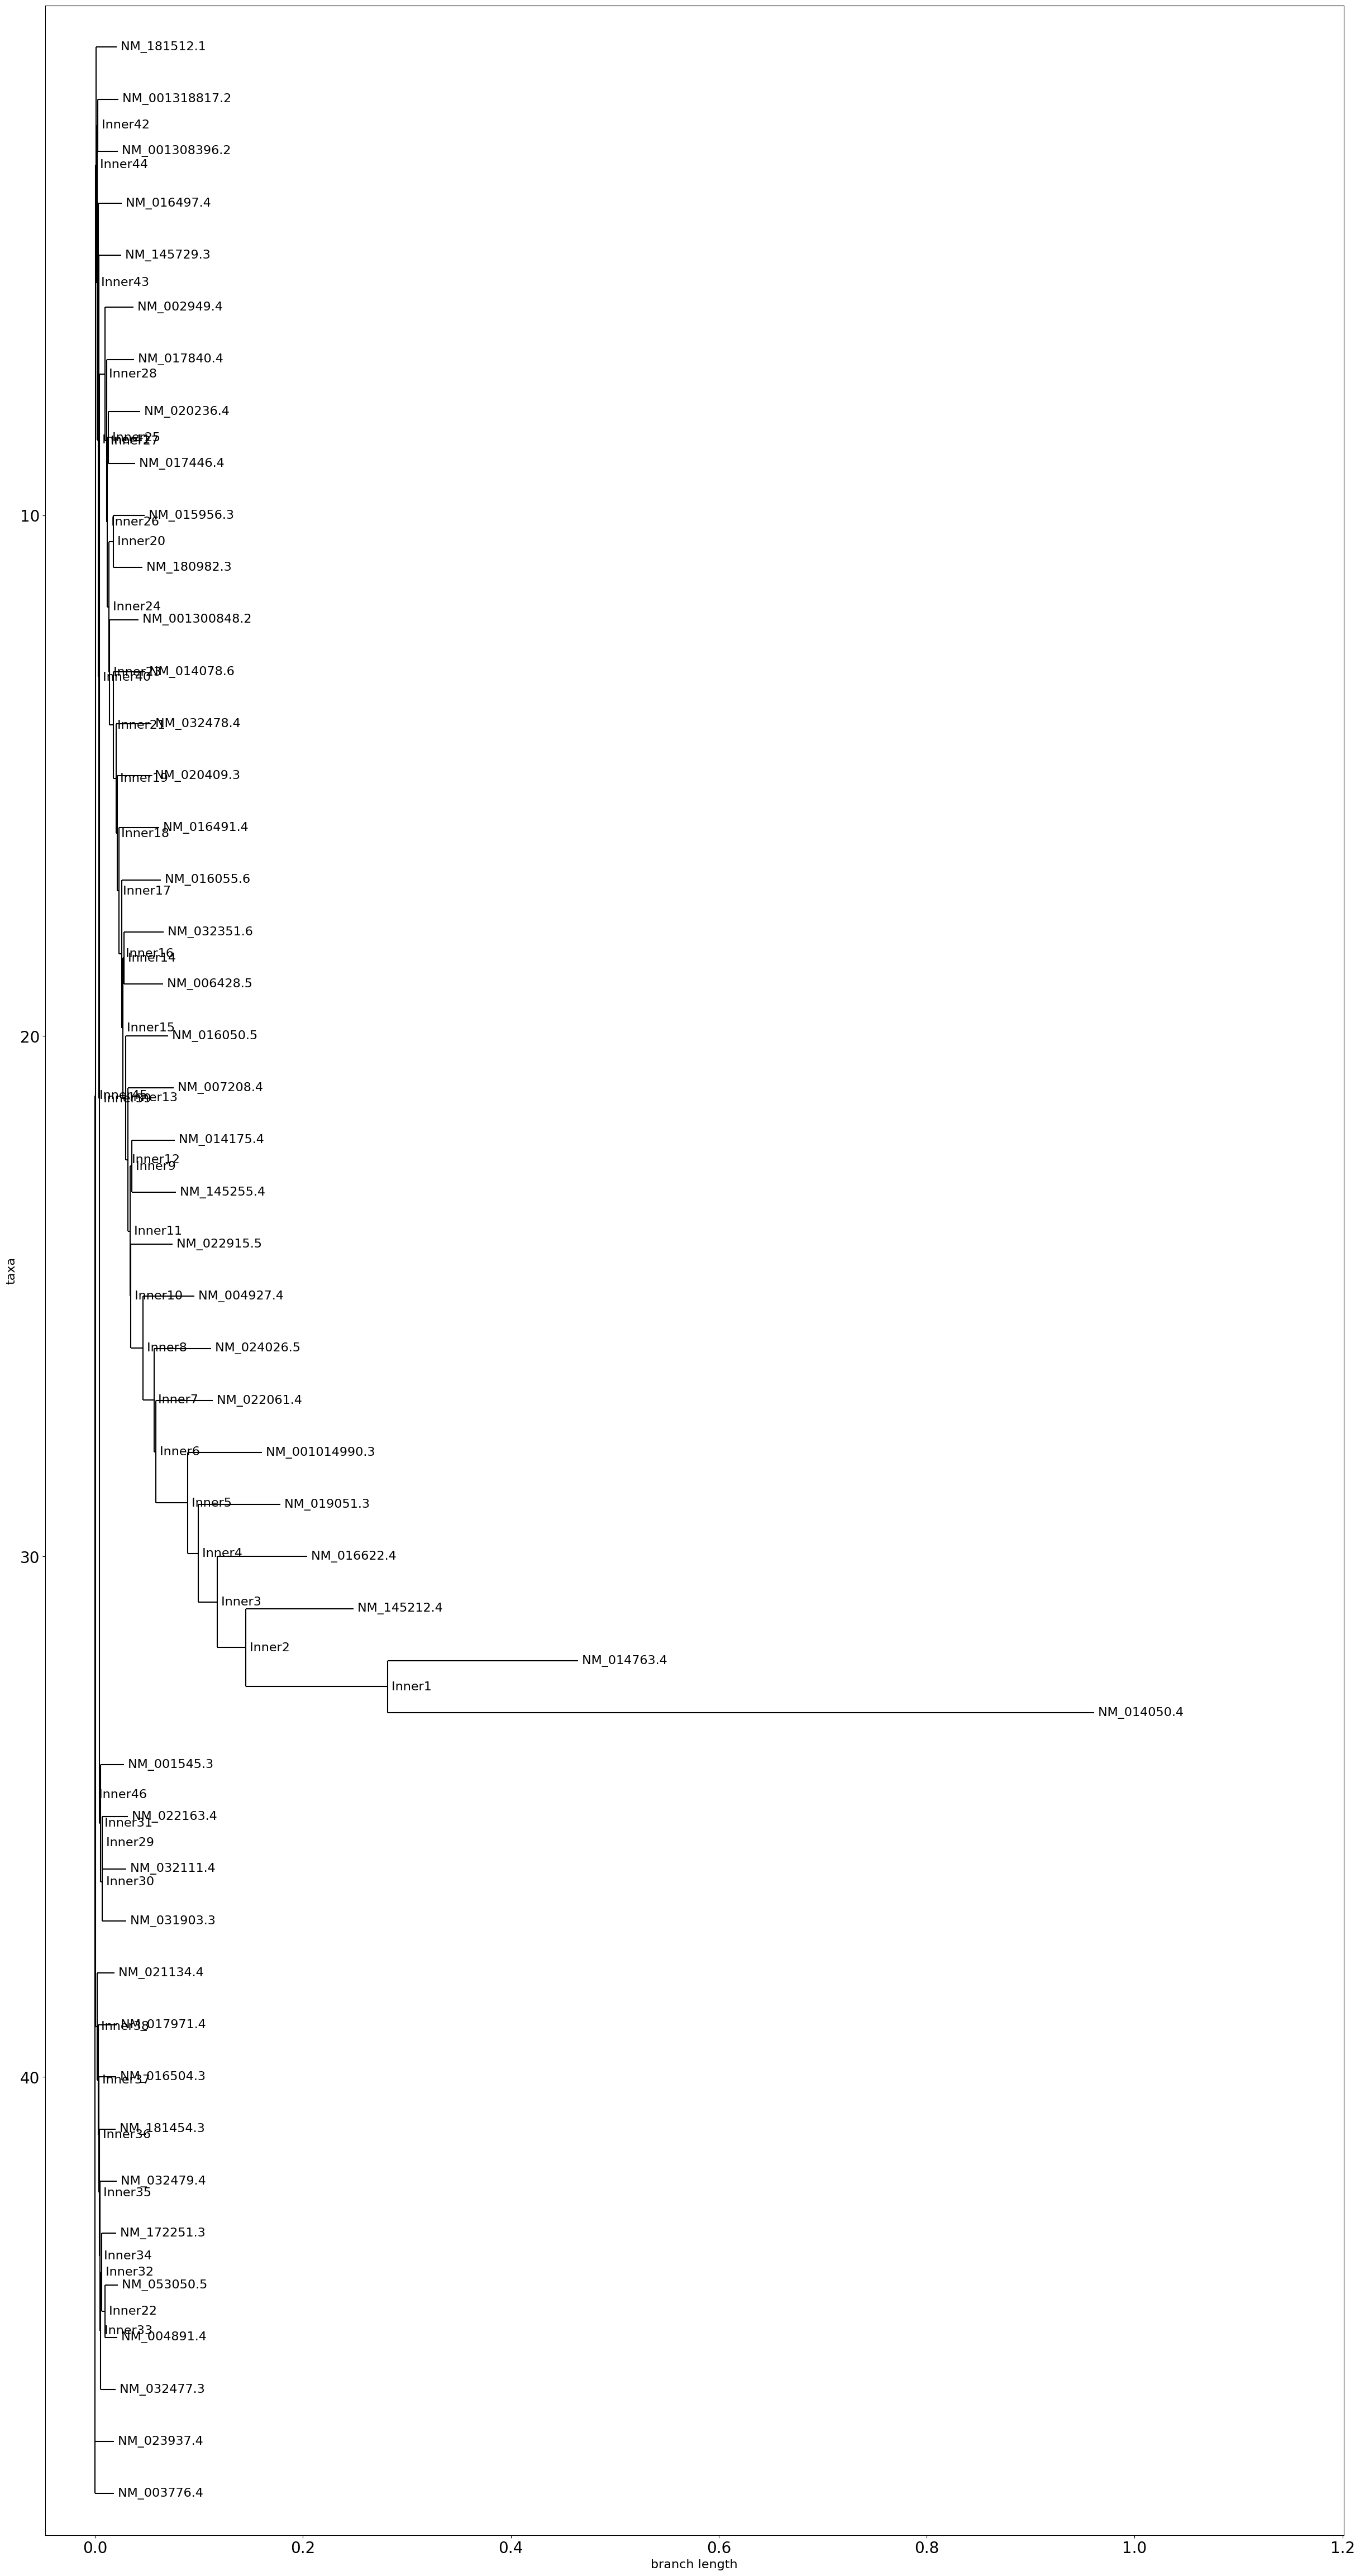

In [118]:
with open("secuencias.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal") 

## Se lee el alineamiento y se realizan calculos utilizando el Bio.Phylo.TreeConstruction
    
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
 
distance_matrix = calculator.get_distance(alignment)


from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

# Construir el arbol 
align_total = constructor.build_tree(alignment)
align_total.rooted = True
Phylo.write(align_total, "align_large_mitochondrial.xml", "phyloxml")

align_large_mitochondrial = Phylo.read(file="align_large_mitochondrial.xml", format= "phyloxml")

# Arbol elemental en Matplotlib
import matplotlib
import matplotlib.pyplot as plt
#fig = Phylo.draw(cis_tree)

fig = plt.figure(figsize=(30, 60), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=16)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=20)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=20)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(align_large_mitochondrial, axes=axes)
fig.savefig("align_protein_ribosomal.jpg")

En la imagen se pudieron analizar 48 secuencias de Large subunit mitochondrial unicamente de la especie homo sapiens. En el grafico se puede distinguir que existen 46 nodos y que las secuencias que presentaron mayor y menor divergencia fueron NM_15050.4 y NM_003776.4 respectivamente. Ademas, en el arbol se puede observar existen mas de dos taxos definidos, por lo que se puede sugerir que las secuencias de las celulas enfermas y sanas son parecidas geneticamente y que no se puede observar facilmente en el analisis filogenetico. Por lo tanto, quizas se necesita mas componentes o secuencias de Large subunit mitochondrial o mas informacion para poder clasificar correctamente a las secuencias sanas y enfermas.  